In [35]:
import pandas as pd
import numpy as np

from skimage import io
from datetime import timedelta
from datetime import datetime
from scipy.stats import pearsonr
from subprocess import run
import imageio # for gifs
import glob
import os
from scipy.stats import norm
# import matplotlib
# from matplotlib import mlab

# Imports for plotting
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter 
from matplotlib.dates import MonthLocator
import matplotlib.patheffects as PathEffects
import matplotlib.dates as mdates

from mpl_toolkits.axes_grid1 import make_axes_locatable

### set up paths

In [2]:
# #ARS
# mask and DEM
# mask_50m_path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_50m/tuolx_hetchy_mask_50m.asc'
# dem_50m_path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_50m/tuolx_dem_50m.asc'

# # ASO snow depth surfaces
# depth_50m_path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_50m/ASO_50m_depth_surfaces/asc/*.asc'
# depth_50m_years = list(range(2013,2018))

In [3]:
# # #BSU
base_path = '/Users/meganmason491/Documents/research/sierra/data/50m_analysis/'

# mask and DEM
mask_50m_path = base_path + 'tuolx_hetchy_mask_50m.asc'
dem_50m_path = base_path + 'tuolx_dem_50m.asc'

# ASO snow depth surfaces
depth_50m_path = base_path + 'asc/*.asc'
years = list(range(2013,2018))

### extract flight dates and times

In [4]:
flist = glob.glob(depth_50m_path)
flist = sorted(flist)
print('Number of files as input:', len(flist))

flight_dates = []

for f in sorted(flist):
    dt_str = f.split("/")[-1] #splits on '/' and saves the last one
    dt_str = "".join([c for c in dt_str if c.isnumeric()]) #grabs numeric values for date info
    flight_dates.append(dt_str) #append to flight_date list

flight_dates_dt = [datetime.strptime(flight_date, '%Y%m%d') for flight_date in flight_dates]

Number of files as input: 47


### load mask and DEM

In [5]:
mask_50m = np.loadtxt(mask_50m_path, skiprows=6)
dem_50m = np.loadtxt(dem_50m_path, skiprows=6)

### compute CDF from histogram

In [79]:
def compute_cdf(depth_array, n_bins, mask_array, mask_value):
    
    '''
    Compute Cumulative Density Function (CDF). 
        args:
            depth_array: 
            n_bins
            mask_array
            mask_value
            
            
            returns:
    '''
    
    d = depth_array[[(mask_50m == 1) & (depth_array > 0)]] #data are inside masked area and >0, scalar
    
    mu = np.nanmean(d)
    sigma = np.nanstd(d)
    
    hist, bins = np.histogram(d, bins=n_bins, density=True)
    
    y = norm.pdf(bins, mu, sigma).cumsum()
    y /= y[-1]
    
    return bins, y
    
# https://matplotlib.org/examples/statistics/histogram_demo_cumulative.html [made several changes....]
# https://stackoverflow.com/questions/9378420/how-to-plot-cdf-in-matplotlib-in-python/43201585

In [85]:
fsmall = flist[:6]
fsmall

['/Users/meganmason491/Documents/research/sierra/data/50m_analysis/asc/TB20130403_SUPERsnow_depth.asc',
 '/Users/meganmason491/Documents/research/sierra/data/50m_analysis/asc/TB20130429_SUPERsnow_depth.asc',
 '/Users/meganmason491/Documents/research/sierra/data/50m_analysis/asc/TB20130503_SUPERsnow_depth.asc',
 '/Users/meganmason491/Documents/research/sierra/data/50m_analysis/asc/TB20130525_SUPERsnow_depth.asc',
 '/Users/meganmason491/Documents/research/sierra/data/50m_analysis/asc/TB20130601_SUPERsnow_depth.asc',
 '/Users/meganmason491/Documents/research/sierra/data/50m_analysis/asc/TB20130608_SUPERsnow_depth.asc']

//anaconda3/envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


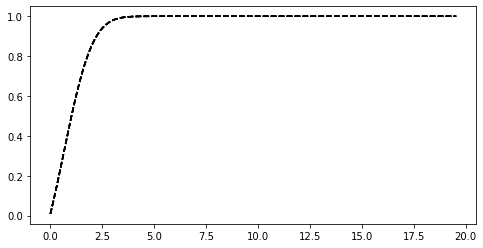

In [98]:
n_bins=100


# fig, ax = plt.subplots(figsize=(8, 4))
plt.figure(figsize=(8, 4))
# label = ['1', '2', '3', '1', '2', '3']

for i, f in enumerate(fsmall):
    depth_array = np.loadtxt(f, skiprows=6)
    compute_cdf(depth_array, n_bins, mask_50m, np.max(mask_50m))

    plt.plot(bins, y, 'k--', linewidth=1.5) #, label=label[i])
plt.show()

/Users/meganmason491/Documents/research/sierra/data/50m_analysis/asc/TB20170717_SUPERsnow_depth.asc


//anaconda3/envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


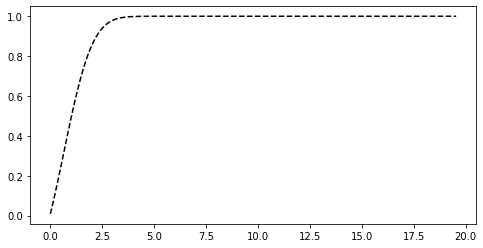

In [82]:
# CDF for one!
fig, ax = plt.subplots(figsize=(8, 4))

f = flist[45]
print(f)
n_bins = 1000
label='sucess??'
depth_array = np.loadtxt(f, skiprows=6)
d = depth_array[[(mask_50m == 1) & (depth_array > 0)]]

mu = np.nanmean(d)
sigma = np.nanstd(d)

hist, bins = np.histogram(d, bins=n_bins,density=True)
y = norm.pdf(bins, mu, sigma).cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label=label)


In [77]:
b=[10.67, 6.32, 7.82, 8.71]
print('first b:', b)

b /= b[-1]
print('second b:', b)

first b: [10.67, 6.32, 7.82, 8.71]


TypeError: unsupported operand type(s) for /=: 'list' and 'float'